In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import re
import csv

In [2]:
matches = pd.read_csv("cleaned_sumo.csv",header=0,index_col=0)
reader = csv.reader(open('sumo_dict.csv', 'r'))
names = {}
for row in reader:
    k, v = row
    names[k] = v

Note: a 7-7 record after day 14 means that depending on the result of the day 15, the rikishi will either get a kachi-koshi (winning record) or a make-koshi (losing record). A kachi-koshi generally results in an increase in rank whereas a make-koshi generally results in moving down in rank. With high rank comes a greater salary and notoriety, thus giving a very large incentive to get a kachi-koshi. Thus, on day 15, a wrestler will be more likely to participate in match fixing to obtain a kachi-koshi. On the opposite side, this also means that they are more motivated to win fairly, which might give a legitimate edge over the opponents. 

For feature engineering I will be creating a list of tuples consisting of an entry for each basho containing which basho it was, the number of matches that were done with one of the rikishi having a 7-7 record on day 15, how many of those matches were wins or losses, and a list of the id's of the rikishi that either won or lost those matches. later if necessary I can add the names of the rikishi that they lost to, or won against.

In [54]:
matches.head(2)

basho.1  day  rikishi1_id rikishi1_rank rikishi1_shikona  \
basho                                                                  
1983-01-01  1983.01    1         4140          J13w      Chikubayama   
1983-01-01  1983.01    1         1337          J12w     Tochitsukasa   

           rikishi1_result  rikishi1_win   kimarite  rikishi2_id  \
basho                                                              
1983-01-01       0-1 (7-8)         False   yorikiri         4306   
1983-01-01       1-0 (9-6)          True  oshidashi         4323   

           rikishi2_rank  ... rikishi2_result rikishi2_win  \
basho                     ...                                
1983-01-01          Ms1e  ...       1-0 (6-1)         True   
1983-01-01          J13e  ...      0-1 (3-12)        False   

            rikishi1_totalwins rikishi1_totallosses rikishi1_wins  \
basho                                                               
1983-01-01                   7                    8             0   
1983-01-01                   9                    6             1   

           rikishi1_losses rikishi2_totalwins rikishi2_totallosses  \
basho                                                                
1983-01-01               1                  6                    1   
1983-01-01               0                  3                    2   

           rikishi2_wins rikishi2_losses  
basho                                     
1983-01-01             1               0  
1983-01-01             0               1  

[2 rows x 21 columns]

In [18]:
bashos = matches.index.unique()
frame = []
for i in bashos:
    win77losers =[]
    win77winners = []
    loss77losers = []
    loss77winners = []
    match77 = 0
    match77win =0
    match77loss = 0
    current = matches[matches.index==i]
    current = current[current['day']==14]
    for index,x in current.iterrows():
        
#       y = current[current['day'] == 15]
        if (x['rikishi1_wins'] == '7') & (x['rikishi1_losses'] == '7'):
            match77 += 1 
            if x['rikishi1_totalwins'] == '8':
                match77win+=1
#                 win77losers.append(y[rikishi2_id])
                win77winners.append(x.rikishi1_id)
            if x['rikishi1_totalwins'] == '7':
                match77loss+=1
#                 loss77winners.append(rikishi2_id)
                loss77losers.append(x.rikishi1_id)
        if (x['rikishi2_wins'] == '7') & (x['rikishi2_losses'] == '7'):
            match77 += 1 
            if x['rikishi2_totalwins'] == '8':
                match77win+=1
#                 win77losers.append(rikishi1_id)
                win77winners.append(x.rikishi2_id)
            if x['rikishi2_totalwins'] == '7':    
                match77loss+=1
#                 loss77winners.append(rikishi1_id)
                loss77losers.append(x.rikishi2_id)
    frame.append(tuple((i,match77,match77win,match77loss,win77winners,loss77losers)))


In [32]:
print(frame[169])

('2011-05-01', 14, 7, 7, [795, 842, 6480, 6497, 6572, 2818, 1235], [1032, 6010, 39, 89, 6467, 6463, 1284])


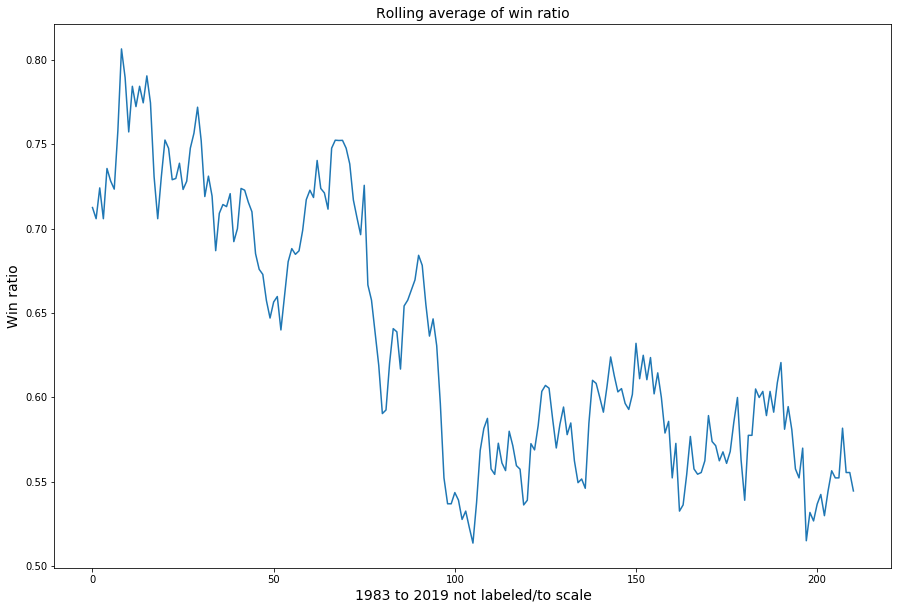

In [56]:
import matplotlib.pyplot as plt
y = [a for a in range(211)]
total= [x[1] for x in frame]
wins = [x[2] for x in frame]
rollave = np.convolve(total, np.ones((10,))/10, mode='valid')
rollave1 = np.convolve(wins, np.ones((10,))/10, mode='valid')
plt.figure(figsize=(15,10))
# plt.plot(y,rollave,label='Total 7-7 matches')
# plt.plot(y,rollave1,label='7-7 wins')

plt.plot(y,rollave1/rollave,label='7-7 winratio')
plt.title("Rolling average of win ratio",fontsize = 14)
plt.ylabel("Win ratio",fontsize = 14)
plt.xlabel("1983 to 2019 not labeled/to scale",fontsize = 14)
plt.show()



Thus we have a little more insight into what is going on. The win ratio of the 7-7 matches in the early 80s to mid 90s were extremely high in comparison to what they should be. We now also have a list of the id's of the rikishi that were winning these matches which we can later use to compare, rikishi by rikishi, to see who the common offenders are. This is still early analysis/feature engineering. 